In [98]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
df = pd.read_csv('merged_AB_AS_MB_SM.csv')

In [100]:
df.head(10)

,Floors,City,Address,Land,Price,Bedroom,Bathroom,Face,Road
0,NaN,Kathmandu,Pepsicola,200.0000,500000.0,0.0,0.0,South East,0.0
1,12.0,Lalitpur,Jhamsikhel,683.0000,40000.0,2.0,1.0,South,0.0
2,2.5,Kathmandu,Golfutar,1779.7000,43000000.0,5.0,5.0,East,0.0
3,NaN,Kathmandu,Budhanilkantha,1369.0000,35000000.0,0.0,0.0,North East,0.0
4,NaN,Kathmandu,Dhumbarahi,2481.3125,51700000.0,0.0,0.0,East,0.0
5,NaN,Lalitpur,Bhaisepati,1796.8125,150000.0,4.0,4.0,East,0.0
6,NaN,Kathmandu,Thamel,10952.0000,1800000.0,43.0,20.0,East,0.0
7,NaN,Kathmandu,Budhanilkantha,10952.0000,150000000.0,0.0,0.0,South East,0.0
8,7.0,Kathmandu,Thamel,53.6700,95000000.0,0.0,0.0,North West,0.0
9,NaN,Bhaktapur,Nagarkot,2053.5000,5550000.0,0.0,0.0,North East,0.0


In [101]:
df['Face'].value_counts()


East              1479
South              810
West               679
North              508
South East         451
North East         334
South West         253
North West         144
west                 6
North/East           4
South/East           2
North/West           2
east                 2
East/North           1
South to East        1
south                1
east and north       1
east/west            1
East-South           1
South-West           1
north                1
north/east           1
Name: Face, dtype: int64

In [102]:
df['Face'] = df['Face'].str.lower()


In [103]:
df['Face'].value_counts()

east              1481
south              811
west               685
north              509
south east         451
north east         334
south west         253
north west         144
north/east           5
north/west           2
south/east           2
east/west            1
south-west           1
east-south           1
south to east        1
east and north       1
east/north           1
Name: Face, dtype: int64

In [104]:
df['Face'] = df['Face'].str.replace('/', ' ').str.replace('-', ' ')


In [105]:
df['Face'].value_counts()

east              1481
south              811
west               685
north              509
south east         453
north east         339
south west         254
north west         146
east west            1
east south           1
south to east        1
east and north       1
east north           1
Name: Face, dtype: int64

In [106]:
df['Face']= df['Face'].str.replace('to','')

In [107]:
df['Face']= df['Face'].str.replace('and','')

In [108]:
df['Face'].value_counts()

east           1481
south           811
west            685
north           509
south east      453
north east      339
south west      254
north west      146
east west         1
east south        1
south  east       1
east  north       1
east north        1
Name: Face, dtype: int64

In [109]:
df['Face'].replace({'east west': 'east',
                    'east south': 'south east',
                    'south east': 'south east',
                    'east north': 'north east',
                    'east north': 'north east'}, inplace=True)


In [110]:
df['Face'].value_counts()

east           1482
south           811
west            685
north           509
south east      454
north east      340
south west      254
north west      146
south  east       1
east  north       1
Name: Face, dtype: int64

In [111]:
df['Face'].replace({
                    'south  east': 'south east',
                     'east  north': 'north east',
                    }, inplace=True)

In [112]:
df['Face'].value_counts()

east          1482
south          811
west           685
north          509
south east     455
north east     341
south west     254
north west     146
Name: Face, dtype: int64

In [113]:
df.to_csv('cleaned_face.csv')

In [114]:
df['Road'].value_counts()

13.000    1546
20.000     799
12.000     446
15.000     425
10.000     384
          ... 
44.000       1
22.967       1
3.281        1
1.000        1
13.500       1
Name: Road, Length: 65, dtype: int64

In [115]:
df.nunique()

Floors       24
City          8
Address     565
Land        465
Price       519
Bedroom      35
Bathroom     30
Face          8
Road         65
dtype: int64

In [116]:
df[df.isnull().any(axis=1)]

,Floors,City,Address,Land,Price,Bedroom,Bathroom,Face,Road
0,NaN,Kathmandu,Pepsicola,200.0000,500000.0,0.0,0.0,south east,0.0
3,NaN,Kathmandu,Budhanilkantha,1369.0000,35000000.0,0.0,0.0,north east,0.0
4,NaN,Kathmandu,Dhumbarahi,2481.3125,51700000.0,0.0,0.0,east,0.0
5,NaN,Lalitpur,Bhaisepati,1796.8125,150000.0,4.0,4.0,east,0.0
6,NaN,Kathmandu,Thamel,10952.0000,1800000.0,43.0,20.0,east,0.0
...,...,...,...,...,...,...,...,...,...
5325,NaN,Kathmandu,Surya Darshan Height,NaN,29500000.0,NaN,NaN,NaN,NaN
5326,2.0,Lalitpur,Villa sunakothi,1454.5600,32500000.0,5.0,3.0,north,NaN
5327,3.5,Kathmandu,Dhumbarahi,NaN,57000000.0,8.0,7.0,NaN,NaN
5328,NaN,Kathmandu,Kalanki,NaN,60000000.0,NaN,NaN,NaN,NaN


In [117]:
df['Address'].value_counts()

Budhanilkantha      375
Imadol              345
Bhaisepati          168
Kapan               131
Tikathali            95
                   ... 
Mahaboudha            1
Aryal-Gaun            1
Dholahiti Height      1
Dhapakhel-23          1
Villa sunakothi       1
Name: Address, Length: 565, dtype: int64

In [118]:
count_gt_10 = (df['Address'].value_counts() > 5).sum()
count_gt_10

181

In [22]:
address_counts = df['Address'].value_counts()
filtered_df = df[df['Address'].isin(address_counts[address_counts >= 5].index)]


In [23]:
filtered_df

,Floors,City,Address,Land,Price,Bedroom,Bathroom,Face,Road
0,NaN,Kathmandu,Pepsicola,200.0000,500000.0,0.0,0.0,south east,0.0
1,12.0,Lalitpur,Jhamsikhel,683.0000,40000.0,2.0,1.0,south,0.0
2,2.5,Kathmandu,Golfutar,1779.7000,43000000.0,5.0,5.0,east,0.0
3,NaN,Kathmandu,Budhanilkantha,1369.0000,35000000.0,0.0,0.0,north east,0.0
4,NaN,Kathmandu,Dhumbarahi,2481.3125,51700000.0,0.0,0.0,east,0.0
...,...,...,...,...,...,...,...,...,...
5321,2.0,Kathmandu,Bansbari,1197.8700,13500000.0,3.0,2.0,west,NaN
5324,NaN,Kathmandu,Satdobato,NaN,27500000.0,NaN,NaN,NaN,NaN
5327,3.5,Kathmandu,Dhumbarahi,NaN,57000000.0,8.0,7.0,NaN,NaN
5328,NaN,Kathmandu,Kalanki,NaN,60000000.0,NaN,NaN,NaN,NaN


In [24]:
df.isnull().sum()

Floors      949
City         12
Address      12
Land         19
Price        42
Bedroom     639
Bathroom    792
Face        647
Road         68
dtype: int64

In [25]:
new_df = df.dropna()

In [26]:
new_df.head(10)

,Floors,City,Address,Land,Price,Bedroom,Bathroom,Face,Road
1,12.0,Lalitpur,Jhamsikhel,683.00000,40000.0,2.0,1.0,south,0.0
2,2.5,Kathmandu,Golfutar,1779.70000,43000000.0,5.0,5.0,east,0.0
8,7.0,Kathmandu,Thamel,53.67000,95000000.0,0.0,0.0,north west,0.0
12,4.0,Kathmandu,Balkhu,1796.81250,60000000.0,0.0,0.0,south,0.0
15,3.0,Kathmandu,Thamel,1369.00000,26000000.0,6.0,5.0,east,0.0
24,3.0,Kathmandu,Chabahil,1194.79290,31000000.0,8.0,4.0,west,0.0
31,4.0,Kathmandu,Chabahil,3080.25000,57500000.0,0.0,0.0,east,0.0
39,4.0,Kathmandu,Balaju,1411.78125,45000000.0,12.0,4.0,north,0.0
40,3.0,Kathmandu,Kapan,1197.87500,15000000.0,4.0,4.0,west,0.0
41,4.0,Lalitpur,Kupondole,2738.00000,95000.0,4.0,2.0,south east,0.0


In [27]:
df.shape

(5330, 9)

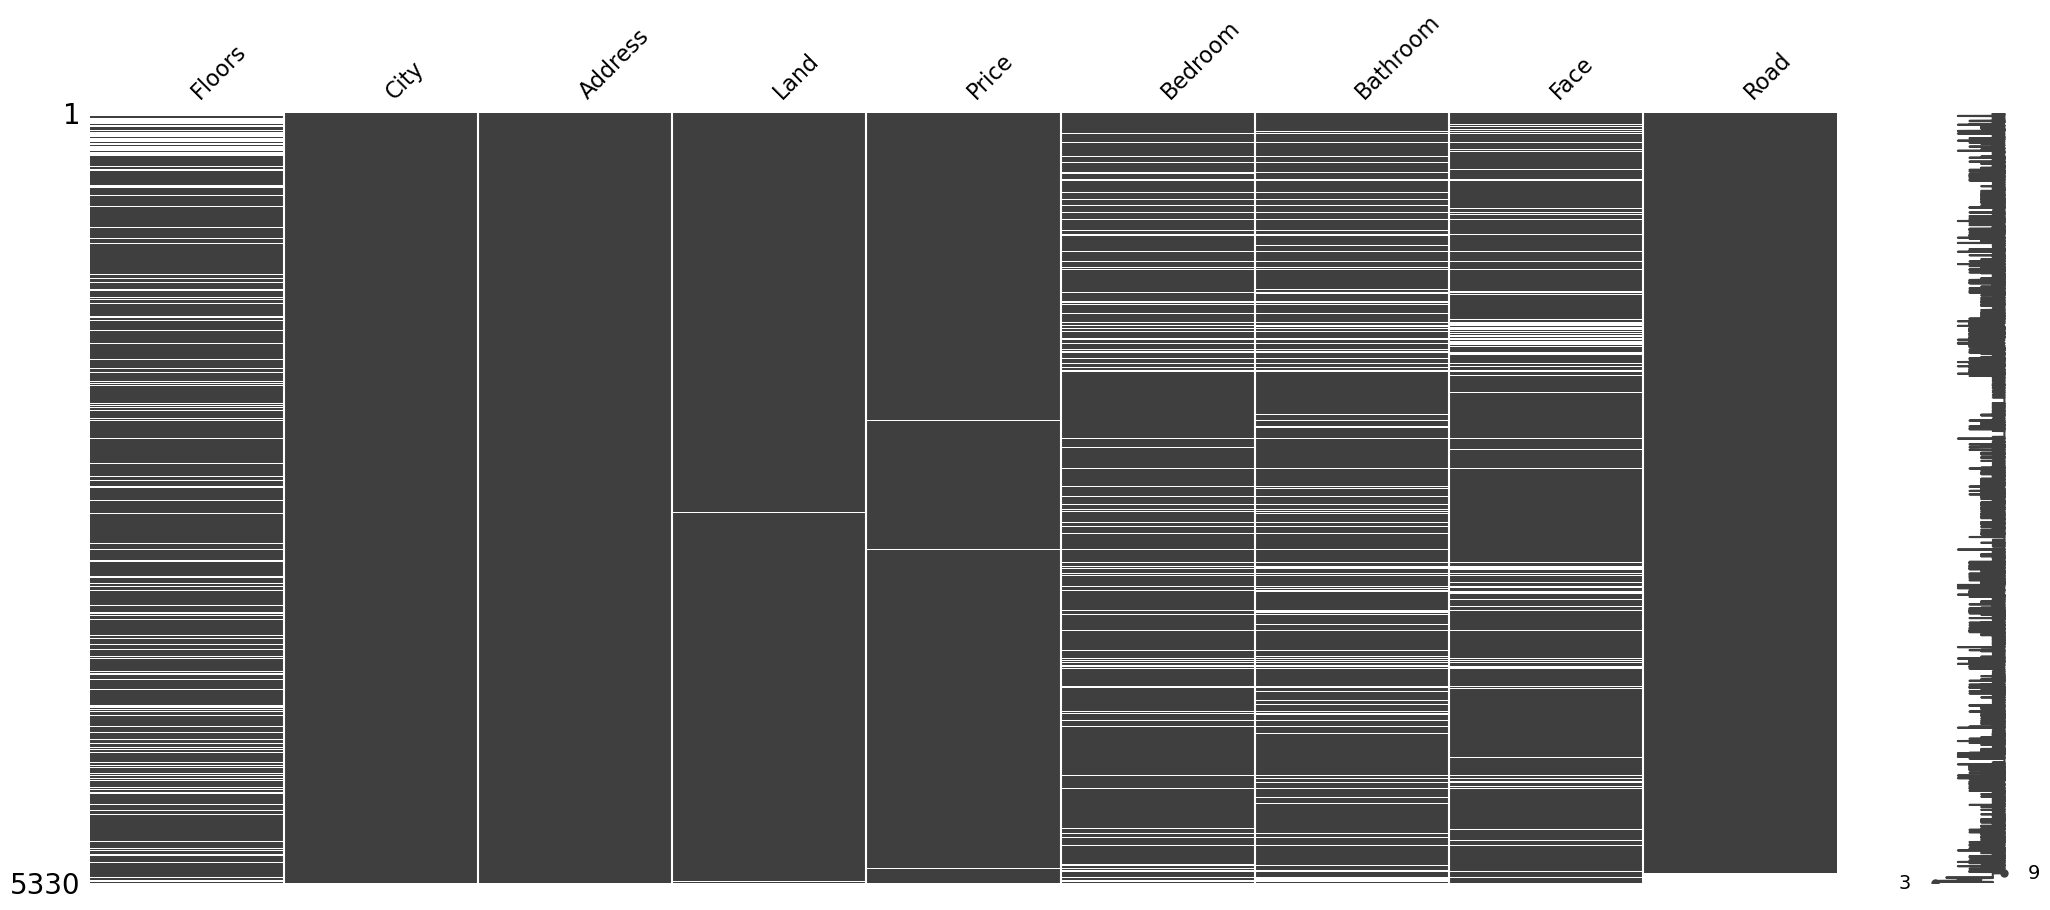

In [119]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()


In [120]:
df['Floors'].unique()

array([  nan, 12.  ,  2.5 ,  7.  ,  4.  ,  3.  ,  1.  ,  6.  ,  2.  ,
        3.5 ,  5.  ,  9.  ,  1.5 ,  4.5 ,  4.25,  1.35,  5.5 , 10.  ,
        8.  ,  0.  ,  8.5 , 20.  ,  2.3 ,  6.5 , 13.  ])

In [123]:
mean_floors = df['Floors'].mean()
df['Floors'] = df['Floors'].fillna(mean_floors)
df['Floors'].isna().sum()

0

In [124]:
df['Bedroom'].unique()

array([ 0. ,  2. ,  5. ,  4. , 43. ,  6. ,  3. ,  nan,  8. ,  7. , 12. ,
        1. , 23. , 17. , 22. ,  9. , 13. , 10. , 18. , 16. , 11. , 36. ,
       15. , 21. , 14. ,  2.5, 25. , 20. , 19. , 28. , 34. ,  3.5, 95. ,
       31. , 24. , 30. ])

In [125]:
median_bedroom = df['Bedroom'].median()
df['Bedroom'] = df['Bedroom'].fillna(median_bedroom)


In [126]:
df['Bedroom'].median()

5.0

In [127]:
median_bathroom = df['Bathroom'].median()
df['Bathroom'] = df['Bathroom'].fillna(median_bathroom)


In [128]:
df['Face'].unique()

array(['south east', 'south', 'east', 'north east', 'north west', 'west',
       nan, 'north', 'south west'], dtype=object)

In [129]:
# Randomly sample existing face directions to fill missing values
existing_faces = df['Face'].dropna().unique()
missing_faces = df['Face'].isnull()
df.loc[missing_faces, 'Face'] = np.random.choice(existing_faces, size=missing_faces.sum())


In [130]:
df['Face'].value_counts()

east          1560
south          893
west           768
north          581
south east     532
north east     429
south west     331
north west     236
Name: Face, dtype: int64

In [131]:
df.isna().sum()

Floors       0
City        12
Address     12
Land        19
Price       42
Bedroom      0
Bathroom     0
Face         0
Road        68
dtype: int64

In [132]:
df.dropna()

,Floors,City,Address,Land,Price,Bedroom,Bathroom,Face,Road
0,2.80299,Kathmandu,Pepsicola,200.000000,500000.0,0.0,0.0,south east,0.00
1,12.00000,Lalitpur,Jhamsikhel,683.000000,40000.0,2.0,1.0,south,0.00
2,2.50000,Kathmandu,Golfutar,1779.700000,43000000.0,5.0,5.0,east,0.00
3,2.80299,Kathmandu,Budhanilkantha,1369.000000,35000000.0,0.0,0.0,north east,0.00
4,2.80299,Kathmandu,Dhumbarahi,2481.312500,51700000.0,0.0,0.0,east,0.00
...,...,...,...,...,...,...,...,...,...
5257,8.00000,Kathmandu,Baneshwor,2200.000000,350000.0,0.0,0.0,south,98.43
5258,3.00000,Kathmandu,Koteshwor,900.000000,60000.0,0.0,4.0,east,98.43
5259,4.00000,Kathmandu,Kalanki,1796.812500,52500000.0,0.0,0.0,west,19.00
5260,4.00000,Kathmandu,Basundhara,523.986652,26000000.0,0.0,4.0,north,21.00


In [133]:
df.isna().sum()

Floors       0
City        12
Address     12
Land        19
Price       42
Bedroom      0
Bathroom     0
Face         0
Road        68
dtype: int64

In [134]:
zero_count = (df['Road'] == 0).sum()
zero_count

299

In [135]:
median_road = df['Road'].median()
df['Road'] = df['Road'].replace(0, median_road)


In [136]:
median_Bedroom = df['Bedroom'].median()
df['Bedroom'] = df['Bedroom'].replace(0, median_road)


In [137]:
median_bathroom = df['Bathroom'].median()
df['Bathroom'] = df['Bathroom'].replace(0, median_bathroom)


In [138]:
zero_count = (df == 0).sum()
zero_count

Floors       6
City         0
Address      0
Land        21
Price        0
Bedroom      0
Bathroom     0
Face         0
Road         0
dtype: int64

In [139]:
median_land = df['Land'].median()
df['Land'] = df['Land'].replace(0, median_land)


In [140]:
median_floors = df['Floors'].median()
df['Floors'] = df['Floors'].replace(0, median_floors)


In [141]:
df.head()

,Floors,City,Address,Land,Price,Bedroom,Bathroom,Face,Road
0,2.80299,Kathmandu,Pepsicola,200.0000,500000.0,13.0,3.0,south east,13.0
1,12.00000,Lalitpur,Jhamsikhel,683.0000,40000.0,2.0,1.0,south,13.0
2,2.50000,Kathmandu,Golfutar,1779.7000,43000000.0,5.0,5.0,east,13.0
3,2.80299,Kathmandu,Budhanilkantha,1369.0000,35000000.0,13.0,3.0,north east,13.0
4,2.80299,Kathmandu,Dhumbarahi,2481.3125,51700000.0,13.0,3.0,east,13.0


433.0

C:\Users\Abiral\AppData\Local\Temp\ipykernel_2220\371128712.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)


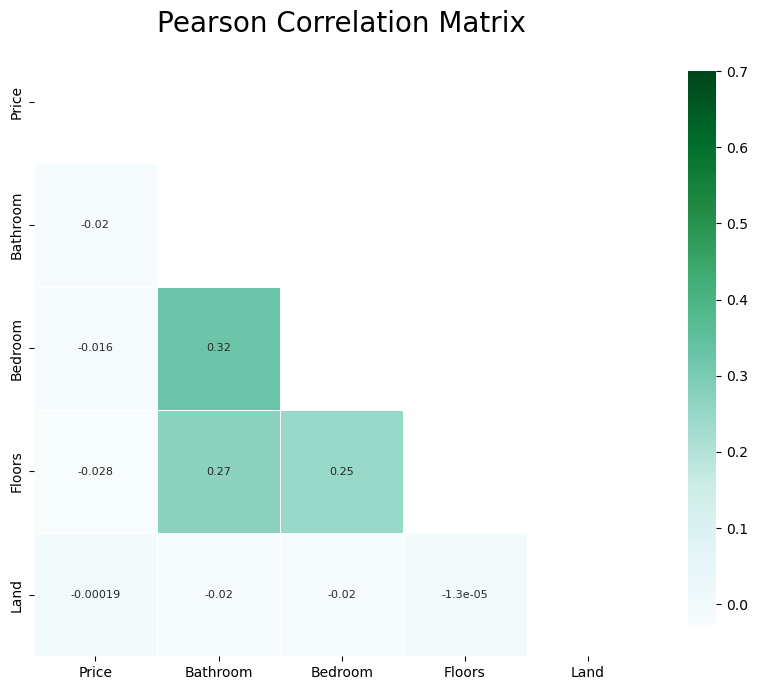

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['Price', 'Bathroom', 'Bedroom', 'Floors', 'Land']

mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
plt.title('Pearson Correlation Matrix', fontsize=20)

sns.heatmap(df[features].corr(), linewidths=0.5, vmax=0.7, square=True, cmap="BuGn",
            linecolor='w', annot=True, annot_kws={"size": 8}, mask=mask, cbar_kws={"shrink": 0.9})

plt.savefig('correlation_matrix.png', dpi=300)
plt.show()


In [71]:
df.duplicated().sum()

213

In [73]:
df.drop_duplicates(inplace=True)


In [144]:
df.isnull().sum()

Floors       0
City        12
Address     12
Land        19
Price       42
Bedroom      0
Bathroom     0
Face         0
Road        68
dtype: int64

In [147]:
df['Price'].dropna(inplace=True)


In [148]:
df.isna().sum()

Floors       0
City        12
Address     12
Land        19
Price       42
Bedroom      0
Bathroom     0
Face         0
Road        68
dtype: int64

In [150]:
rows_with_missing_values = df[df.isna().any(axis=1)]
print(rows_with_missing_values)



       Floors       City               Address     Land       Price  Bedroom  \
747   2.80299  Kathmandu             Anamnagar  3935.87         NaN      5.0   
880   3.00000   Lalitpur             Tikathali  3080.25         NaN      7.0   
938   5.50000  Kathmandu              Sundhara  2524.09         NaN     36.0   
1035  2.50000   Lalitpur              Hattiban  2224.62         NaN      5.0   
1064  2.50000  Kathmandu               Kalanki  1197.87         NaN      4.0   
...       ...        ...                   ...      ...         ...      ...   
5325  2.80299  Kathmandu  Surya Darshan Height      NaN  29500000.0      5.0   
5326  2.00000   Lalitpur       Villa sunakothi  1454.56  32500000.0      5.0   
5327  3.50000  Kathmandu            Dhumbarahi      NaN  57000000.0      8.0   
5328  2.80299  Kathmandu               Kalanki      NaN  60000000.0      5.0   
5329  2.80299  Kathmandu             Bhaktapur      NaN  85000000.0      5.0   

      Bathroom        Face  Road  
747 

In [151]:
df.dropna(inplace=True)


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 5261
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Floors    5210 non-null   float64
 1   City      5210 non-null   object 
 2   Address   5210 non-null   object 
 3   Land      5210 non-null   float64
 4   Price     5210 non-null   float64
 5   Bedroom   5210 non-null   float64
 6   Bathroom  5210 non-null   float64
 7   Face      5210 non-null   object 
 8   Road      5210 non-null   float64
dtypes: float64(6), object(3)
memory usage: 407.0+ KB
